In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',None)

# Table of Contents

1. [Read Data](#rd)
2. [Preprocessing](#pp)
3. [Lasso](#l)
4. [Elastic Net](#en)
5. [Random Forest](#rf)
6. [Multiple Linear Regression](#mlr)

## Read Data

<a id='rd'></a>

In [7]:
data = pd.read_csv('../processed_data/train_dummy_ordinal.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
data["logSalePrice"] = data.SalePrice.map(lambda x: np.math.log(x))
print(data.shape)
data.head()

(1460, 227)


,Id,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,decade_YearBuilt,decade_YearRemodAdd,decade_GarageYrBlt,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_fv,MSZoning_rh,MSZoning_rl,MSZoning_rm,Street_pave,Alley_nothing,Alley_pave,LotShape_ir2,LotShape_ir3,LotShape_reg,LandContour_hls,LandContour_low,LandContour_lvl,Utilities_nosewa,LotConfig_culdsac,LotConfig_fr2,LotConfig_fr3,LotConfig_inside,Neighborhood_blueste,Neighborhood_brdale,Neighborhood_brkside,Neighborhood_clearcr,Neighborhood_collgcr,Neighborhood_crawfor,Neighborhood_edwards,Neighborhood_gilbert,Neighborhood_idotrr,Neighborhood_meadowv,Neighborhood_mitchel,Neighborhood_names,Neighborhood_noridge,Neighborhood_npkvill,Neighborhood_nridght,Neighborhood_nwames,Neighborhood_oldtown,Neighborhood_sawyer,Neighborhood_sawyerw,Neighborhood_somerst,Neighborhood_stonebr,Neighborhood_swisu,Neighborhood_timber,Neighborhood_veenker,Condition1_feedr,Condition1_norm,Condition1_posa,Condition1_posn,Condition1_rrae,Condition1_rran,Condition1_rrne,Condition1_rrnn,Condition2_feedr,Condition2_norm,Condition2_posa,Condition2_posn,Condition2_rrae,Condition2_rran,Condition2_rrnn,BldgType_2fmcon,BldgType_duplex,BldgType_twnhs,BldgType_twnhse,HouseStyle_1.5unf,HouseStyle_1story,HouseStyle_2.5fin,HouseStyle_2.5unf,HouseStyle_2story,HouseStyle_sfoyer,HouseStyle_slvl,RoofStyle_gable,RoofStyle_gambrel,RoofStyle_hip,RoofStyle_mansard,RoofStyle_shed,RoofMatl_compshg,RoofMatl_membran,RoofMatl_metal,RoofMatl_roll,RoofMatl_tar&grv,RoofMatl_wdshake,RoofMatl_wdshngl,Exterior1st_asphshn,Exterior1st_brkcomm,Exterior1st_brkface,Exterior1st_cblock,Exterior1st_cemntbd,Exterior1st_hdboard,Exterior1st_imstucc,Exterior1st_metalsd,Exterior1st_plywood,Exterior1st_stone,Exterior1st_stucco,Exterior1st_vinylsd,Exterior1st_wd sdng,Exterior1st_wdshing,Exterior2nd_asphshn,Exterior2nd_brk cmn,Exterior2nd_brkface,Exterior2nd_cblock,Exterior2nd_cmentbd,Exterior2nd_hdboard,Exterior2nd_imstucc,Exterior2nd_metalsd,Exterior2nd_other,Exterior2nd_plywood,Exterior2nd_stone,Exterior2nd_stucco,Exterior2nd_vinylsd,Exterior2nd_wd sdng,Exterior2nd_wd shng,MasVnrType_brkface,MasVnrType_nothing,MasVnrType_stone,Foundation_cblock,Foundation_pconc,Foundation_slab,Foundation_stone,Foundation_wood,Heating_gasa,Heating_gasw,Heating_grav,Heating_othw,Heating_wall,CentralAir_y,Electrical_fusef,Electrical_fusep,Electrical_mix,Electrical_sbrkr,GarageType_attchd,GarageType_basment,GarageType_builtin,GarageType_carport,GarageType_detchd,GarageType_nothing,PavedDrive_p,PavedDrive_y,Fence_gdwo,Fence_mnprv,Fence_mnww,Fence_nothing,MiscFeature_nothing,MiscFeature_othr,MiscFeature_shed,MiscFeature_tenc,SaleType_con,SaleType_conld,SaleType_conli,SaleType_conlw,SaleType_cwd,SaleType_new,SaleType_oth,SaleType_wd,SaleCondition_adjland,SaleCondition_alloca,SaleCondition_family,SaleCondition_normal,SaleCondition_partial,logSalePrice
0,1,65,8450,3,7,5,2003,2003,196,4,3,4,3,1,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,2003,2,2,548,3,3,0,61,0,0,0,0,0,0,2,2008,208500,10,10,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0

## Preprocessing

<a id='pp'></a>

In [5]:
# remove outliers

data.drop([1298,523], inplace=True)

In [6]:
data[(data['OverallQual']==10) & (data['SalePrice']<200000)]

,Id,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,decade_YearBuilt,decade_YearRemodAdd,decade_GarageYrBlt,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_fv,MSZoning_rh,MSZoning_rl,MSZoning_rm,Street_pave,Alley_nothing,Alley_pave,LotShape_ir2,LotShape_ir3,LotShape_reg,LandContour_hls,LandContour_low,LandContour_lvl,Utilities_nosewa,LotConfig_culdsac,LotConfig_fr2,LotConfig_fr3,LotConfig_inside,Neighborhood_blueste,Neighborhood_brdale,Neighborhood_brkside,Neighborhood_clearcr,Neighborhood_collgcr,Neighborhood_crawfor,Neighborhood_edwards,Neighborhood_gilbert,Neighborhood_idotrr,Neighborhood_meadowv,Neighborhood_mitchel,Neighborhood_names,Neighborhood_noridge,Neighborhood_npkvill,Neighborhood_nridght,Neighborhood_nwames,Neighborhood_oldtown,Neighborhood_sawyer,Neighborhood_sawyerw,Neighborhood_somerst,Neighborhood_stonebr,Neighborhood_swisu,Neighborhood_timber,Neighborhood_veenker,Condition1_feedr,Condition1_norm,Condition1_posa,Condition1_posn,Condition1_rrae,Condition1_rran,Condition1_rrne,Condition1_rrnn,Condition2_feedr,Condition2_norm,Condition2_posa,Condition2_posn,Condition2_rrae,Condition2_rran,Condition2_rrnn,BldgType_2fmcon,BldgType_duplex,BldgType_twnhs,BldgType_twnhse,HouseStyle_1.5unf,HouseStyle_1story,HouseStyle_2.5fin,HouseStyle_2.5unf,HouseStyle_2story,HouseStyle_sfoyer,HouseStyle_slvl,RoofStyle_gable,RoofStyle_gambrel,RoofStyle_hip,RoofStyle_mansard,RoofStyle_shed,RoofMatl_compshg,RoofMatl_membran,RoofMatl_metal,RoofMatl_roll,RoofMatl_tar&grv,RoofMatl_wdshake,RoofMatl_wdshngl,Exterior1st_asphshn,Exterior1st_brkcomm,Exterior1st_brkface,Exterior1st_cblock,Exterior1st_cemntbd,Exterior1st_hdboard,Exterior1st_imstucc,Exterior1st_metalsd,Exterior1st_plywood,Exterior1st_stone,Exterior1st_stucco,Exterior1st_vinylsd,Exterior1st_wd sdng,Exterior1st_wdshing,Exterior2nd_asphshn,Exterior2nd_brk cmn,Exterior2nd_brkface,Exterior2nd_cblock,Exterior2nd_cmentbd,Exterior2nd_hdboard,Exterior2nd_imstucc,Exterior2nd_metalsd,Exterior2nd_other,Exterior2nd_plywood,Exterior2nd_stone,Exterior2nd_stucco,Exterior2nd_vinylsd,Exterior2nd_wd sdng,Exterior2nd_wd shng,MasVnrType_brkface,MasVnrType_nothing,MasVnrType_stone,Foundation_cblock,Foundation_pconc,Foundation_slab,Foundation_stone,Foundation_wood,Heating_gasa,Heating_gasw,Heating_grav,Heating_othw,Heating_wall,CentralAir_y,Electrical_fusef,Electrical_fusep,Electrical_mix,Electrical_sbrkr,GarageType_attchd,GarageType_basment,GarageType_builtin,GarageType_carport,GarageType_detchd,GarageType_nothing,PavedDrive_p,PavedDrive_y,Fence_gdwo,Fence_mnprv,Fence_mnww,Fence_nothing,MiscFeature_nothing,MiscFeature_othr,MiscFeature_shed,MiscFeature_tenc,SaleType_con,SaleType_conld,SaleType_conli,SaleType_conlw,SaleType_cwd,SaleType_new,SaleType_oth,SaleType_wd,SaleCondition_adjland,SaleCondition_alloca,SaleCondition_family,SaleCondition_normal,SaleCondition_partial,logSalePrice


In [7]:
# drop columns

data.drop(['Id','Utilities_nosewa','Alley_nothing','Alley_pave','PoolQC','YearBuilt','YearRemodAdd','GarageYrBlt','SalePrice'], axis=1, inplace=True)
# data.drop(['HeatingQC','SalePrice'], axis=1, inplace=True)
data.shape

(1458, 218)

In [8]:
# train test split

X = data.drop('logSalePrice', axis=1)
y = data.logSalePrice

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=4)

## Lasso

<a id='l'></a>

In [9]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold

lasso = Lasso(normalize=True, max_iter=1000000)
params_lasso = [ {'alpha':[1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]} ]
kf5 = KFold(n_splits=5, shuffle=True)

grid_lasso = GridSearchCV(estimator=lasso, param_grid=params_lasso, cv = kf5)

grid_lasso.fit(Xtrain, ytrain)

grid_lasso.best_score_

0.9059699413358254

In [10]:
best_lasso = grid_lasso.best_estimator_
grid_lasso.best_params_

{'alpha': 0.0001}

In [11]:
coefs = pd.DataFrame(best_lasso.coef_, index=Xtrain.columns).sort_values(0, ascending=False)
coefs[coefs[0]!=0].shape

(96, 1)

In [12]:
from sklearn.metrics import mean_squared_error

lasso_pred = best_lasso.predict(Xtrain)
mean_squared_error(ytrain, lasso_pred)

0.010946994226192707

In [26]:
coefs = pd.DataFrame(best_lasso.coef_, index=Xtrain.columns).sort_values(0, ascending=False)
coefs[coefs[0]!=0].index.to_list()

['SaleType_new',
 'Neighborhood_crawfor',
 'RoofMatl_membran',
 'Neighborhood_stonebr',
 'Neighborhood_nridght',
 'Street_pave',
 'SaleType_oth',
 'Neighborhood_somerst',
 'SaleCondition_normal',
 'OverallQual',
 'CentralAir_y',
 'Exterior1st_brkface',
 'RoofMatl_wdshngl',
 'Condition1_norm',
 'OverallCond',
 'MSZoning_rl',
 'Exterior2nd_stucco',
 'HalfBath',
 'LotConfig_culdsac',
 'Foundation_pconc',
 'FullBath',
 'MSZoning_fv',
 'LotShape_ir2',
 'Condition2_norm',
 'KitchenQual',
 'GarageCars',
 'Functional',
 'BsmtFullBath',
 'SaleType_cwd',
 'decade_YearBuilt',
 'Fireplaces',
 'BsmtExposure',
 'MasVnrType_stone',
 'Neighborhood_clearcr',
 'Foundation_stone',
 'GarageFinish',
 'GarageQual',
 'Neighborhood_brkside',
 'Exterior1st_stucco',
 'PavedDrive_y',
 'MiscFeature_nothing',
 'Exterior1st_metalsd',
 'decade_YearRemodAdd',
 'BsmtQual',
 'HeatingQC',
 'ExterQual',
 'FireplaceQu',
 'Heating_gasw',
 'MSZoning_rh',
 'BsmtFinType1',
 'TotRmsAbvGrd',
 'Neighborhood_veenker',
 'Electrica

## Elastic Net

<a id='en'></a>

## Random Forest

<a id='rf'></a>

In [83]:
rf_data = pd.read_csv('../processed_data/train_ordinal.csv')
rf_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,decade_YearBuilt,decade_YearRemodAdd,decade_GarageYrBlt
0,1,60,rl,65,8450,pave,nothing,reg,lvl,allpub,inside,3,collgcr,norm,norm,1fam,2story,7,5,2003,2003,gable,compshg,vinylsd,vinylsd,brkface,196,4,3,pconc,4,3,1,6,706,1,0,150,856,gasa,5,y,sbrkr,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,attchd,2003,2,2,548,3,3,y,0,61,0,0,0,0,0,nothing,nothing,0,2,2008,wd,normal,208500,10,10,10
1,2,20,rl,80,9600,pave,nothing,reg,lvl,allpub,fr2,3,veenker,feedr,norm,1fam,1story,6,8,1976,1976,gable,compshg,metalsd,metalsd,nothing,0,3,3,cblock,4,3,4,5,978,1,0,284,1262,gasa,5,y,sbrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,attchd,1976,2,2,460,3,3,y,298,0,0,0,0,0,0,nothing,nothing,0,5,2007,wd,normal,181500,7,7,7
2,3,60,rl,68,11250,pave,nothing,ir1,lvl,allpub,inside,3,collgcr,norm,norm,1fam,2story,7,5,2001,2002,gable,compshg,vinylsd,vinylsd,brkface,162,4,3,pconc,4,3,2,6,486,1,0,434,920,gasa,5,y,sbrkr,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,attchd,2001,2,2,608,3,3,y,0,42,0,0,0,0,0,nothing,nothing,0,9,2008,wd,normal,223500,10,10,10
3,4,70,rl,60,9550,pave,nothing,ir1,lvl,allpub,corner,3,crawfor,norm,norm,1fam,2story,7,5,1915,1970,gable,compshg,wd sdng,wd shng,nothing,0,3,3,brktil,3,4,1,5,216,1,0,540,756,gasa,4,y,sbrkr,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,detchd,1998,1,3,642,3,3,y,0,35,272,0,0,0,0,nothing,nothing,0,2,2006,wd,abnorml,140000,1,7,9
4,5,60,rl,84,14260,pave,nothing,ir1,lvl,allpub,fr2,3,noridge,norm,norm,1fam,2story,8,5,2000,2000,gable,compshg,vinylsd,vinylsd,brkface,350,4,3,pconc,4,3,3,6,655,1,0,490,1145,gasa,5,y,sbrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,attchd,2000,2,3,836,3,3,y,192,84,0,0,0,0,0,nothing,nothing,0,12,2008,wd,normal,250000,10,10,10


In [62]:
# Converting nominal columns to numeric

def text_to_num(x):
    '''get a column as param and return column coded in numeric
    from 1 to len of columns'''
    feature = set(x.to_list())
    # get a mapping of feature with their index from 1
    feature_dict = dict(zip( sorted(feature),range(1,len(feature)+1)))
    return x.map(feature_dict)

# Get only categorical columns
text_col = rf_data[~rf_data.applymap(np.isreal)].dropna(axis=1).columns

# Transform apply function on text columns and create a temp df
num_col = rf_data[text_col].apply(text_to_num)

# Drop text column and merge data frame to create a full df.
rf_data = pd.concat((rf_data.drop(text_col, axis = 1),num_col), axis=1)

rf_data.head()

,Id,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,decade_YearBuilt,decade_YearRemodAdd,decade_GarageYrBlt,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65,8450,3,7,5,2003,2003,196,4,3,4,3,1,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,2003,2,2,548,3,3,0,61,0,0,0,0,0,0,2,2008,208500,10,10,10,4,2,2,4,4,1,5,6,3,3,1,6,2,2,13,14,2,3,2,2,5,2,3,5,2,9,5
1,2,20,80,9600,3,6,8,1976,1976,0,3,3,4,3,4,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,1976,2,2,460,3,3,298,0,0,0,0,0,0,0,5,2007,181500,7,7,7,4,2,2,4,4,1,3,25,2,3,1,3,2,2,9,9,3,2,2,2,5,2,3,5,2,9,5
2,3,60,68,11250,3,7,5,2001,2002,162,4,3,4,3,2,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,2001,2,2,608,3,3,0,42,0,0,0,0,0,0,9,2008,223500,10,10,10,4,2,2,1,4,1,5,6,3,3,1,6,2,2,13,14,2,3,2,2,5,2,3,5,2,9,5
3,4,70,60,9550,3,7,5,1915,1970,0,3,3,3,4,1,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1998,1,3,642,3,3,0,35,272,0,0,0,0,0,2,2006,140000,1,7,9,4,2,2,1,4,1,1,7,3,3,1,6,2,2,14,16,3,1,2,2,5,6,3,5,2,9,1
4,5,60,84,14260,3,8,5,2000,2000,350,4,3,4,3,3,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,2000,2,3,836,3,3,192,84,0,0,0,0,0,0,12,2008,250000,10,10,10,4,2,2,1,4,1,3,14,3,3,1,6,2,2,13,14,2,3,2,2,5,2,3,5,2,9,5


In [63]:
# Other data cleaning, and Train test split

rf_data.drop([1298,523], inplace=True)
rf_data["logSalePrice"] = rf_data.SalePrice.map(lambda x: np.math.log(x))
rf_data.drop(['Id','SalePrice'], axis=1, inplace=True)

rf_X = rf_data.drop('logSalePrice', axis=1)
rf_y = rf_data.logSalePrice

from sklearn.model_selection import train_test_split

rf_Xtrain, rf_Xtest, rf_ytrain, rf_ytest = train_test_split(rf_X, rf_y, random_state=4)

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=4)
rf_dummy = RandomForestRegressor(random_state=4)
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}

In [65]:
# Gridsearch and fit models

rf_grid_params = {'max_depth': range(1, 31), 'n_estimators': range(10, 110, 10)}

rf_grid = GridSearchCV(rf, rf_grid_params, cv=5, n_jobs=-1)
%time rf_grid.fit(rf_Xtrain, rf_ytrain)

CPU times: user 3.32 s, sys: 313 ms, total: 3.64 s
Wall time: 3min 5s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=4,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 31),
         

In [66]:
rf_grid_dummy = GridSearchCV(rf_dummy, rf_grid_params, cv=5, n_jobs=-1)
%time rf_grid_dummy.fit(Xtrain, ytrain)

CPU times: user 6.08 s, sys: 274 ms, total: 6.36 s
Wall time: 5min 4s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=4,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 31),
         

In [67]:
# Results
print('No Dummy')
print(f'Best Params: \t{rf_grid.best_params_}')
print(f'Best Score: \t{rf_grid.best_score_}')

print('\nDummy')
print(f'Best Params: \t{rf_grid_dummy.best_params_}')
print(f'Best Score: \t{rf_grid_dummy.best_score_}')

No Dummy
Best Params: 	{'max_depth': 13, 'n_estimators': 50}
Best Score: 	0.8666939408575965

Dummy
Best Params: 	{'max_depth': 20, 'n_estimators': 50}
Best Score: 	0.8635880737223881


## Multiple Linear Regression

<a id='mlr'></a>

In [2]:
# get data

mlr_data = pd.read_csv('../processed_data/train_mlr2.csv')
print(mlr_data.shape)
mlr_data.head()

(1460, 32)


,Unnamed: 0,Id,OverallQual,OverallCond,KitchenQual,GarageCars,Functional,Fireplaces,BsmtExposure,GarageFinish,GarageQual,BsmtQual,HeatingQC,ExterQual,FireplaceQu,BsmtFinType1,BsmtFinType2,TotRmsAbvGrd,BsmtFinSF1,MasVnrArea,BsmtFinSF2,KitchenAbvGr,Outdoor_Rec,Total_Fullbath,Total_Halfbath,Total_House_Area,FinBsmt,SalePrice,logSalePrice,CentralAir_y,PavedDrive_p,PavedDrive_y
0,0,1,7,5,4,2,8,0,1,2,3,4,5,4,0,6,1,8,706,196,0,1,61,3,1,2566,0.824766,208500,12.247694,1,0,1
1,1,2,6,8,3,2,8,1,4,2,3,4,5,3,3,5,1,6,978,0,0,1,298,2,1,2524,0.774960,181500,12.109011,1,0,1
2,2,3,7,5,4,2,8,1,2,2,3,4,5,4,3,6,1,6,486,162,0,1,42,3,1,2706,0.528261,223500,12.317167,1,0,1
3,3,4,7,5,4,3,8,1,1,1,3,3,4,3,4,5,1,7,216,0,0,1,307,2,0,2473,0.285714,140000,11.849398,1,0,1
4,4,5,8,5,4,3,8,1,3,2,3,4,5,4,3,6,1,9,655,350,0,1,276,3,1,3343,0.572052,250000,12.429216,1,0,1


In [3]:
# drop columns and outliers

mlr_data.drop([1298,523], inplace=True)

mlr_data.drop(['Unnamed: 0',
               'Id',
               'OverallCond',
               'SalePrice',
               'BsmtFinSF1',
               'BsmtFinSF2'], axis=1, inplace=True)
mlr_data.shape

(1458, 26)

In [4]:
# train test split

mlr_X = mlr_data.drop('logSalePrice', axis=1)
mlr_y = mlr_data.logSalePrice

from sklearn.model_selection import train_test_split

mlr_Xtrain, mlr_Xtest, mlr_ytrain, mlr_ytest = train_test_split(mlr_X, mlr_y, test_size=.2, random_state=4)

In [5]:
# fit model

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(mlr_Xtrain, mlr_ytrain)
mlr.score(mlr_Xtrain, mlr_ytrain)

0.8811836129715347

10.033605667340446


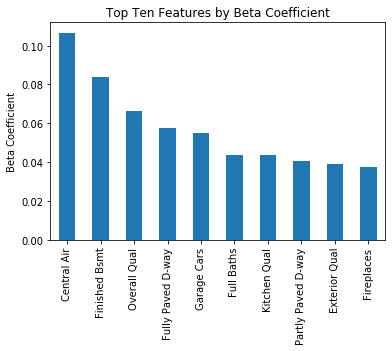

In [9]:
# make plot

print(mlr.intercept_)
labels = ['Central Air','Finished Bsmt','Overall Qual','Fully Paved D-way','Garage Cars','Full Baths','Kitchen Qual','Partly Paved D-way','Exterior Qual','Fireplaces']
pd.DataFrame(mlr.coef_, index=mlr_Xtrain.columns).sort_values(0, ascending=False).head(10).plot.bar(legend=False)
plt.title('Top Ten Features by Beta Coefficient')
plt.ylabel('Beta Coefficient')
plt.xticks(np.arange(10), labels=labels)
plt.show()